In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dom_data = pd.read_csv("housing_LR.csv")

dom_df = pd.DataFrame(dom_data)

dom_df

,Unnamed: 0,district,rooms,size,level,max_levels,price
0,0,Юнусабадский,3,57.0,4,4,52000.0
1,1,Яккасарайский,2,52.0,4,5,56000.0
2,2,Чиланзарский,2,42.0,4,4,37000.0
3,3,Чиланзарский,3,65.0,1,4,49500.0
4,4,Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...,...
7273,7460,Яшнободский,1,38.0,5,5,24500.0
7274,7461,Яшнободский,2,49.0,1,4,32000.0
7275,7462,Шайхантахурский,2,64.0,3,9,40000.0
7276,7463,Мирзо-Улугбекский,1,18.0,1,4,11000.0


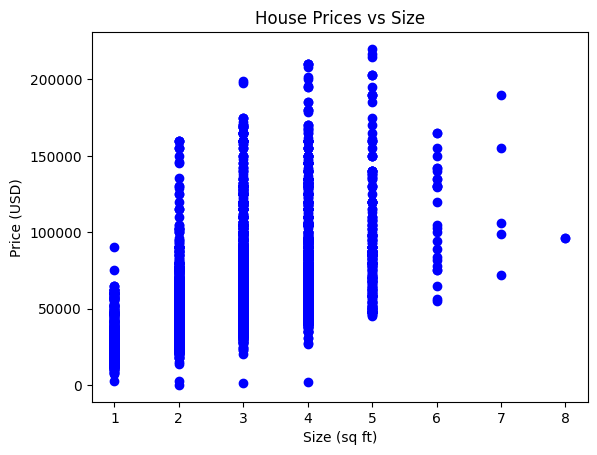

In [3]:
X = dom_df[['rooms', 'size', 'level', 'max_levels']]
X_size = dom_df[['size']]
X_level = dom_df[['level']]
X_max = dom_df[['max_levels']]
y = dom_df["price"]
plt.scatter(dom_df["rooms"], dom_df["price"], color="blue")
plt.title("House Prices vs Size")
plt.xlabel("Size (sq ft)")
plt.ylabel("Price (USD)")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test
#S
X_trainS, X_testS, y_trainS, y_testS = train_test_split(X_size, y, test_size=0.2, random_state=42)

X_trainS, X_testS
#l
X_trainL, X_testL, y_trainL, y_testL = train_test_split(X_level, y, test_size=0.2, random_state=42)

X_trainL, X_testL
#ML
X_trainM, X_testM, y_trainM, y_testM = train_test_split(X_max, y, test_size=0.2, random_state=42)

X_trainM, X_testM

(      max_levels
 2887           4
 4411           9
 6482           4
 4801           9
 5148           4
 ...          ...
 5191           9
 5226           4
 5390           5
 860            4
 7270           4
 
 [5822 rows x 1 columns],
       max_levels
 6060           4
 6626           4
 6750           4
 3689           4
 4516           5
 ...          ...
 2876           4
 325            4
 2206           4
 290            5
 6838           4
 
 [1456 rows x 1 columns])

In [5]:
bek_house = LinearRegression()

bek_houseS = LinearRegression()
bek_houseL = LinearRegression()
bek_houseML = LinearRegression()

bek_house.fit(X_train, y_train)
bek_houseS.fit(X_trainS, y_trainS)
bek_houseL.fit(X_trainL, y_trainL)
bek_houseML.fit(X_trainM, y_trainM)

print("Intercept:", bek_house.intercept_)
print("Slope:", bek_house.coef_[0])
print("Intercept:", bek_houseS.intercept_)
print("Slope:", bek_houseS.coef_[0])
print("Intercept:", bek_houseL.intercept_)
print("Slope:", bek_houseL.coef_[0])
print("Intercept:", bek_houseML.intercept_)
print("Slope:", bek_houseML.coef_[0])

Intercept: 230.82629688859743
Slope: -2568.7973086609254
Intercept: -2010.5609497361438
Slope: 797.7600812318595
Intercept: 50306.769702252896
Slope: 1030.279362409561
Intercept: 36450.90449205226
Slope: 2930.2626805961677


In [6]:
y_pred = bek_house.predict(X_test)
y_predS = bek_houseS.predict(X_testS)
y_predL = bek_houseL.predict(X_testL)
y_predM = bek_houseML.predict(X_testM)

# Display predictions
results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
results

,Actual,Predicted
0,39000.0,37300.942065
1,66000.0,76482.150514
2,25000.0,31156.031796
3,102000.0,45938.859028
4,30500.0,26894.656511
...,...,...
1451,47000.0,46779.754136
1452,37500.0,33739.668420
1453,107000.0,59774.524888
1454,38000.0,38192.000712


In [7]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mseS = mean_squared_error(y_testS, y_predS)
r2S = r2_score(y_testS, y_predS)
mseL = mean_squared_error(y_testL, y_predL)
r2L = r2_score(y_testL, y_predL)
mseM = mean_squared_error(y_testM, y_predM)
r2M = r2_score(y_testM, y_predM)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Mean Squared Error S:", mseS)
print("R^2 Score S:", r2S)
print("Mean Squared Error L:", mseL)
print("R^2 Score L:", r2L)
print("Mean Squared Error M:", mseM)
print("R^2 Score M:", r2M)

Mean Squared Error: 318059617.7567014
R^2 Score: 0.646957272519917
Mean Squared Error S: 330697424.31454164
R^2 Score S: 0.632929444252958
Mean Squared Error L: 894312003.9121968
R^2 Score L: 0.0073233713031202186
Mean Squared Error M: 848618567.2615451
R^2 Score M: 0.05804259060188821


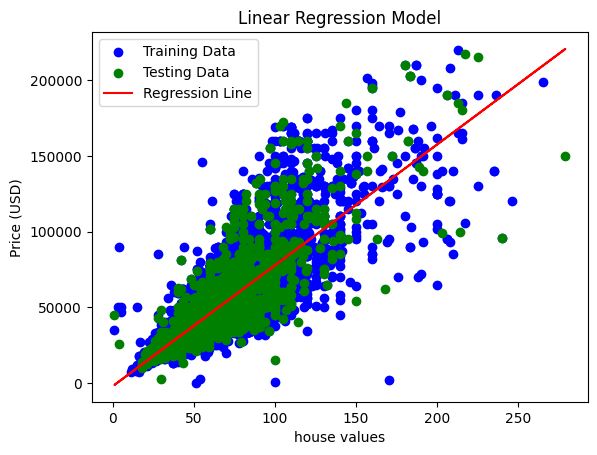

In [8]:
plt.scatter(X_trainS, y_trainS, color="blue", label="Training Data")
plt.scatter(X_testS, y_testS, color="green", label="Testing Data")
plt.plot(X_size, bek_houseS.predict(X_size), color="red", label="Regression Line")
plt.title("Linear Regression Model")
plt.xlabel("house values")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

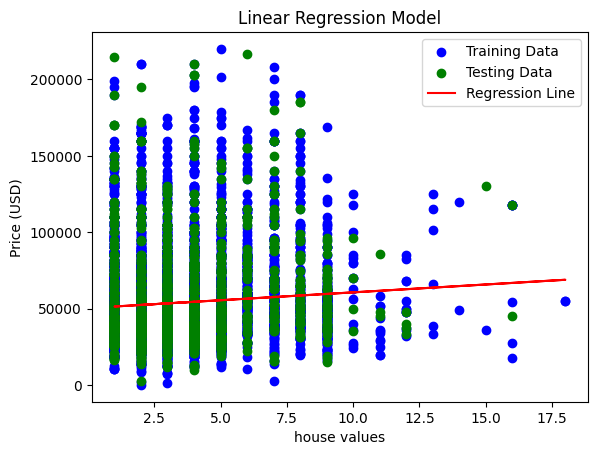

In [9]:
plt.scatter(X_trainL, y_trainL, color="blue", label="Training Data")
plt.scatter(X_testL, y_testL, color="green", label="Testing Data")
plt.plot(X_level, bek_houseL.predict(X_level), color="red", label="Regression Line")
plt.title("Linear Regression Model")
plt.xlabel("house values")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

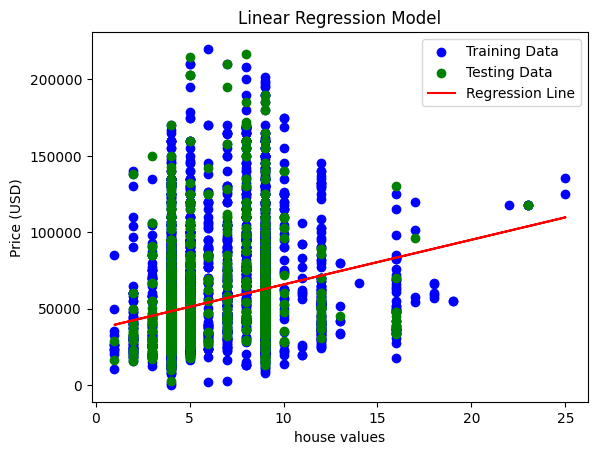

In [10]:
plt.scatter(X_trainM, y_trainM, color="blue", label="Training Data")
plt.scatter(X_testM, y_testM, color="green", label="Testing Data")
plt.plot(X_max, bek_houseML.predict(X_max), color="red", label="Regression Line")
plt.title("Linear Regression Model")
plt.xlabel("house values")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [13]:
pr = input(":")
# Get input for all four features
rooms = float(input("Enter number of rooms: "))
size = float(input("Enter size: "))
level = float(input("Enter level: "))
max_levels = float(input("Enter max levels: "))

# Predict using all four features
pred = bek_house.predict([[rooms, size, level, max_levels]])

print(pred)

:500
Enter number of rooms: 3
Enter size: 120
Enter level: 2
Enter max levels: 5
[98210.31673244]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
